# Resume & Cover Letter Analyzer 
Field: Career Technology (NLP)

**Key Features:**

- Resume Parsing: Extract details such as skills, experience, education, certifications, and projects.

- Job-Resume Matching: Compare extracted resume features against job descriptions.

- AI Suggestions: Generate actionable recommendations using the OpenAI API for resume improvements.

**Tech Stack & Skills:**

- Languages/Libraries: Python, Pandas, Scikit-learn

- NLP Tools: SpaCy (for text cleaning & entity extraction), OpenAI API

- Visualization libraries (e.g., Matplotlib/Seaborn) for EDA

## Dataset Overview

Source: Kaggle 

Name: [AI-Powered Resume Screening Dataset (2025)](https://www.kaggle.com/datasets/mdtalhask/ai-powered-resume-screening-dataset-2025/data)

Size: 1000 synthetic entries 

Key Features: Job Role, Skills, Experience, Certifications, Target Salary

Use Cases: AI-Powered Hiring Research, Salary Prediction Models, Resume Screening Automation


## Intro to the Dataset & Library Setup
### 1.1 Import Necessary Libraries 

In [ ]:
# General Utilities 
import warnings 
warnings.filterwarnings('ignore') # to suppress warnings

import pandas as pd # Data Manipulation and Analysis
import numpy as np # Numerical Operations

# Visualizations 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

# Machine Learning & Preprocessing 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import xgboost as XGBClassifier 

# Statistical Testing
import scipy.stats as stats 

Lays the foundation for data loading, exploration, and visual analysis.

### 1.2 Data Ingestion & Initial Exploration

Understand the dataset's shape, schema, and descriptive statistics before cleaning or analysis

In [4]:
df = pd.read_csv("../data/AI_Resume_Screening.csv")
# Display the first few rows
df.head()

,Resume_ID,Name,Skills,Experience (Years),Education,Certifications,Job Role,Recruiter Decision,Salary Expectation ($),Projects Count,AI Score (0-100)
0,1,Ashley Ali,"TensorFlow, NLP, Pytorch",10,B.Sc,NaN,AI Researcher,Hire,104895,8,100
1,2,Wesley Roman,"Deep Learning, Machine Learning, Python, SQL",10,MBA,Google ML,Data Scientist,Hire,113002,1,100
2,3,Corey Sanchez,"Ethical Hacking, Cybersecurity, Linux",1,MBA,Deep Learning Specialization,Cybersecurity Analyst,Hire,71766,7,70
3,4,Elizabeth Carney,"Python, Pytorch, TensorFlow",7,B.Tech,AWS Certified,AI Researcher,Hire,46848,0,95
4,5,Julie Hill,"SQL, React, Java",4,PhD,NaN,Software Engineer,Hire,87441,9,100


In [5]:
# Display column names, number of entries, and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Resume_ID               1000 non-null   int64 
 1   Name                    1000 non-null   object
 2   Skills                  1000 non-null   object
 3   Experience (Years)      1000 non-null   int64 
 4   Education               1000 non-null   object
 5   Certifications          726 non-null    object
 6   Job Role                1000 non-null   object
 7   Recruiter Decision      1000 non-null   object
 8   Salary Expectation ($)  1000 non-null   int64 
 9   Projects Count          1000 non-null   int64 
 10  AI Score (0-100)        1000 non-null   int64 
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


There are 11 columns, and all 1000 rows have values in every column except for `certifications`, which has 726 non-null entries. This indicates that our data is mostly complete and only the `certifications` column is missing some values. We can quickly verify the missing values using df.isnull().sum() to see exactly which columns need attention.

#### Column Name & Description (Sourced From Kaggle)

- **Resume Id** The identification number assigned to the resume candidate (Integer)
- **Name** Name of the candidate (String)
- **Skills** List of relevant technical skills (String)
- **Experience** The candidate total work experience in years (Integer)
- **Education** Highest level of education (String)
- **Certifications** Relevant industry certifications (String)
- **Job Role** Target Job Position (String)
- **Recruiter Decision** Hire or reject (String)
- **Salary Expectations** Expected Salary (Integer)
- **Project Count** Number of projects completed (Integer)
- **AI Score** On a scale of 0-100 AI based resume ranking score (Integer)

In [7]:
df.isnull().sum()

Resume_ID                   0
Name                        0
Skills                      0
Experience (Years)          0
Education                   0
Certifications            274
Job Role                    0
Recruiter Decision          0
Salary Expectation ($)      0
Projects Count              0
AI Score (0-100)            0
dtype: int64

Given that the goal is to build a resume analyzer that classifies if a candidate will be hired or not, we should focus on the following columns:

- Useful features: Skills, Experience (Years), Education, Certifications, Job Role, Salary Expectation ($), Projects Count, AI Score (0-100)

- Target variable: Recruiter Decision (since it shows "Hire" vs. "Reject")

The "Resume_ID" and "Name" columns are identifiers and likely do not add predictive value; we can disregard them when training our classification model.

In [9]:
# Statistical Summary
df.describe()

,Resume_ID,Experience (Years),Salary Expectation ($),Projects Count,AI Score (0-100)
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,500.500000,4.896000,79994.486000,5.13300,83.950000
std,288.819436,3.112695,23048.472549,3.23137,20.983036
min,1.000000,0.000000,40085.000000,0.00000,15.000000
25%,250.750000,2.000000,60415.750000,2.00000,70.000000
50%,500.500000,5.000000,79834.500000,5.00000,100.000000
75%,750.250000,8.000000,99583.250000,8.00000,100.000000
max,1000.000000,10.000000,119901.000000,10.00000,100.000000


#### Key Takeaways from Descriptive Statistics 

Resume_ID:

- Mean and range indicate IDs are sequentially generated (from 1 to 1000), so they are not useful for prediction.

Experience (Years):

- Average experience is about 4.9 years, with a range from 0 to 10 years.

Salary Expectation ($):

- The average salary expectation is around $80k, with a minimum of ~$40k and a maximum near $120k.

Projects Count:

- The average number of projects is roughly 5, with values ranging from 0 to 10.

AI Score (0-100):

- The average AI Score is about 84, with many candidates scoring near 100, although the distribution shows a lower bound of 15.



In [11]:
df.shape

(1000, 11)

As previously mentioned, there are 11 columns and a thousand rows. 

#### Understand the Dataset Structure and Potential Issues

Dataset Structure:

- There are 11 columns representing key candidate information.

- Most columns are complete, except for "Certifications" which has missing values.

- Numeric columns (like Experience, Salary, Projects, and AI Score) have reasonable ranges suitable for analysis.

Potential Issues:

- Missing Values: The "Certifications" column has about 27.4% missing data, which should be imputed or filled in a systematic way.

- Irrelevant Columns: "Resume_ID" and "Name" are identifiers and can be dropped when building a prediction model.

- Outliers or Skewness: A deeper look at distributions may be needed, especially in columns like AI Score and Salary Expectation.


## Data Cleaning & Preprocessing
### 2.1 Handle Incorrect Date Types (Optional)
- Convert categorical variables to type category for performance gains. (Not Necessary since the current data types are appropriate for analysis and modeling)

In [ ]:
# Convert categorical columns to category dtype
# categorical_cols = ['Name', 'Skills', 'Education', 'Certifications', 'Job Role', 'Recruiter Decision']
# for col in categorical_cols:
#     df[col] = df[col].astype('category')

### 2.2 Drop Unnecessary Columns 
- Remove columns that are not needed for model training, like `Resume_ID` and `Name`.

In [12]:
df.drop(['Resume_ID', 'Name'], axis=1, inplace=True)

In [ ]:
# Check
df.columns

Index(['Skills', 'Experience (Years)', 'Education', 'Certifications',
       'Job Role', 'Recruiter Decision', 'Salary Expectation ($)',
       'Projects Count', 'AI Score (0-100)'],
      dtype='object')

### 2.3 Missing Value Imputation
- For `Certifications`, we are going to fill in the missing values with a placeholder value ("None")

In [20]:
df['Certifications'] = df['Certifications'].fillna('None')

In [21]:
# Check 
df['Certifications'].value_counts()

Certifications
None                            274
Deep Learning Specialization    255
AWS Certified                   249
Google ML                       222
Name: count, dtype: int64

### 2.4 Feature Engineering 
- Convert the skills column into a numerical features: Number of Skills

In [30]:
df['Skill Count'] = df['Skills'].apply(lambda x: len(str(x).split(',')))
# We use str(x) just in case there are any nulls or weird types in that column.

In [31]:
# Check 
# Peek at the new column
print(df[['Skills', 'Skill Count']].head())

# Basic stats
print(df['Skill Count'].value_counts())

# Sanity check: spot-check one manually
print(df['Skills'][0], '->', df['Skill Count'][0])

                                         Skills  Skill Count
0                      TensorFlow, NLP, Pytorch            3
1  Deep Learning, Machine Learning, Python, SQL            4
2         Ethical Hacking, Cybersecurity, Linux            3
3                   Python, Pytorch, TensorFlow            3
4                              SQL, React, Java            3
Skill Count
3    351
4    333
2    316
Name: count, dtype: int64
TensorFlow, NLP, Pytorch -> 3


### 2.5 Saving the Clean Data
- Save the processed dataset for future use.

In [33]:
df.to_csv('../data/cleaned_resume_dataset.csv', index=False)

## Analysis Sections
### Univariate Analysis
-  Focus on individual features:

### 3.1 Distributions:

- Plot histograms for AI Score, Experience, and Salary Expectation.


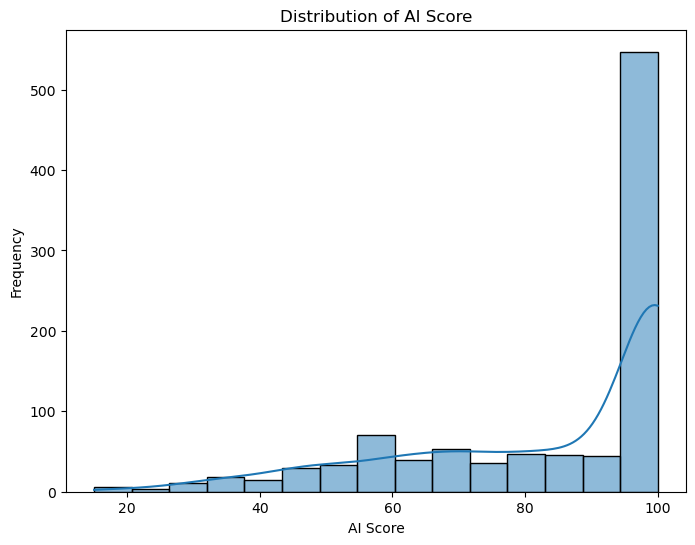

In [35]:
# Histogram for AI Score
plt.figure(figsize=(8, 6))
sns.histplot(df['AI Score (0-100)'], bins='auto', kde=True)
plt.title('Distribution of AI Score')
plt.xlabel('AI Score')
plt.ylabel('Frequency')
plt.show()

The distribution of AI scores is left-skewed, with a significant concentration at the maximum value of 100 (503 instances). This suggests that the AI scoring algorithm may be too generous or that many applicants are highly qualified. Other common scores include 70, 80, and 85, but there’s a steep drop-off after that.

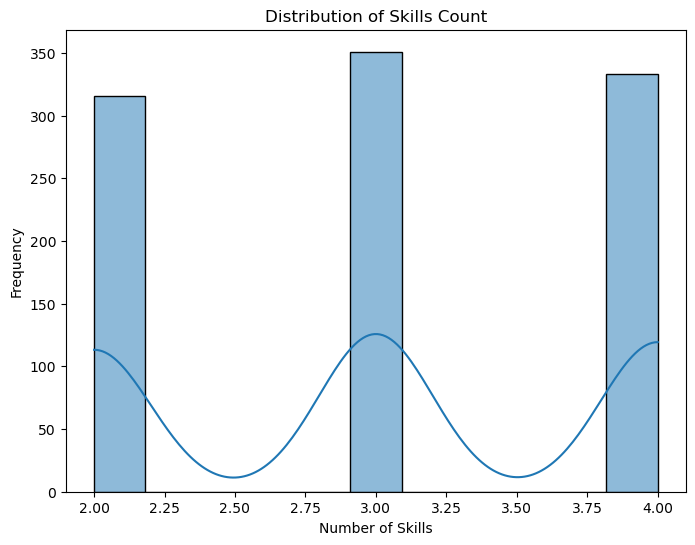

In [51]:
# Histogram for Experience
plt.figure(figsize=(8, 6))
sns.histplot(df['Skill Count'], bins='auto', kde=True)
plt.title('Distribution of Skills Count')
plt.xlabel('Number of Skills')
plt.ylabel('Frequency')
plt.show()

The distribution of skill counts is multimodal, with most candidates having 2–4 skills. A peak at 3 and 4 skills suggests a sweet spot in qualifications, whereas fewer or more than that may be less common. This may reflect resume tailoring or a focus on specialized roles.


### 3.2 Outlier Detection:

- Use boxplots to detect outliers and check the spread.

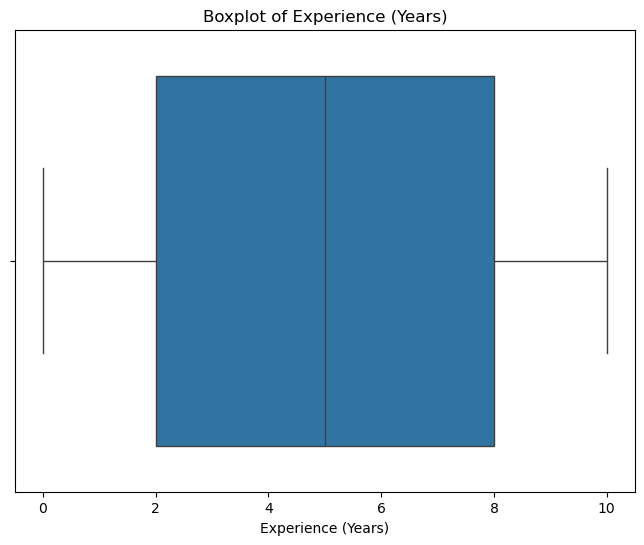

In [44]:
# Boxplot for Experience (Years)
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Experience (Years)'])
plt.title('Boxplot of Experience (Years)')
plt.show()


There are any present outliers for the years of experience. 

### 3.3 Job Roles Applied For

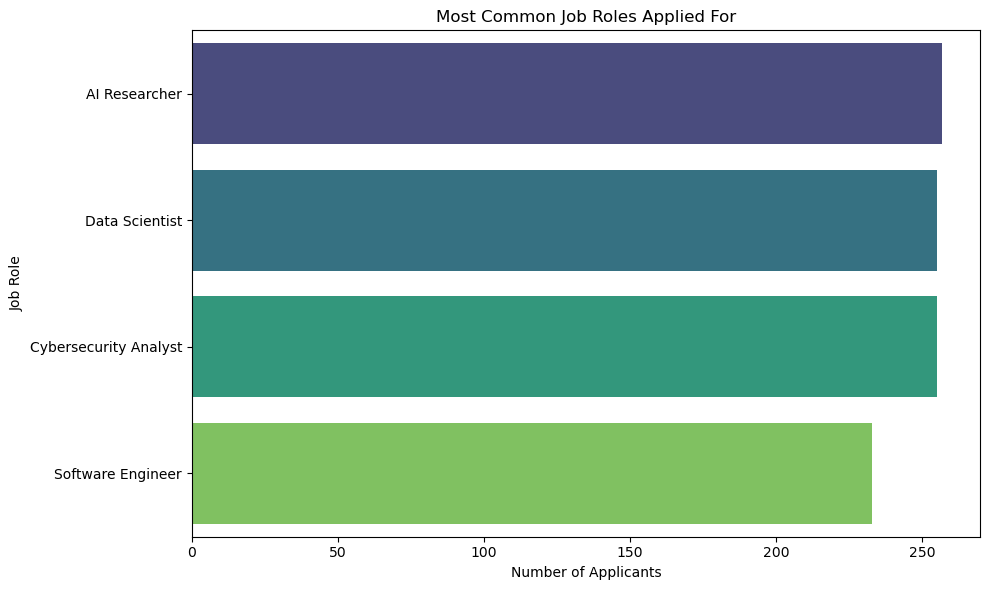

In [53]:
job_counts = df['Job Role'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(y=job_counts.index, x=job_counts.values, palette='viridis')
plt.title('Most Common Job Roles Applied For')
plt.xlabel('Number of Applicants')
plt.ylabel('Job Role')
plt.tight_layout()
plt.show()

The most commonly applied job roles include Data Scientist, AI Researcher, and Cybersecurity Analyst. Data Science and AI-related roles dominate the applicant pool, reflecting current trends in tech demand. Cybersecurity roles also maintain a solid presence, suggesting growing interest in infosec positions.



### Bivariate Analysis
- Compare two features at a time:

### 4.1 Experience vs. Recruiter Decision:

- Compare the average experience for candidates hired vs. rejected.

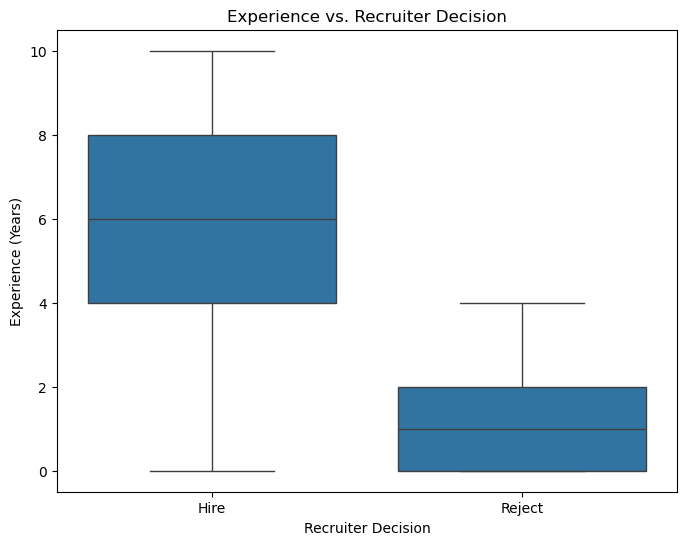

In [45]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Recruiter Decision', y='Experience (Years)', data=df)
plt.title('Experience vs. Recruiter Decision')
plt.show()


Candidates who are hired tend to have more experience, with a typical range around 2–5 years and no visible outliers. The upper quartile of hired applicants centers around 2 years, but the average hired candidate has 4.8 years of experience. In contrast, rejected applicants mostly have less than 4 years of experience, averaging just 1 year.

### 4.2 Salary Expectation vs. Recruiter Decision:
- Visualize if there is a gap in salary expectations between the groups.

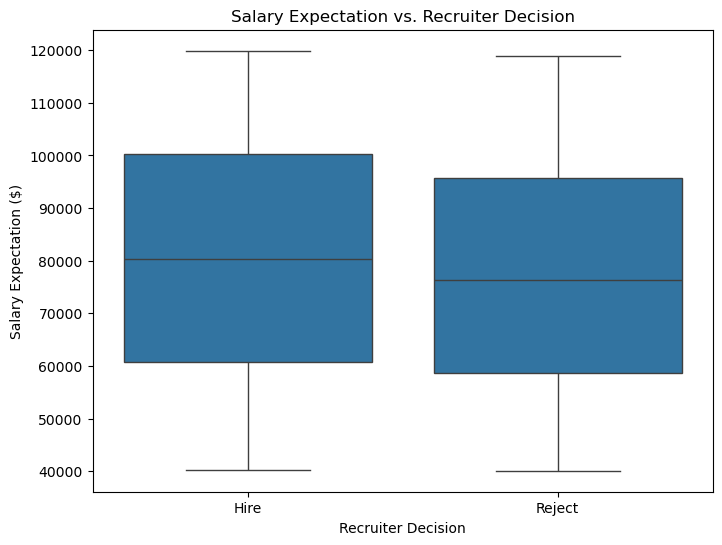

In [46]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Recruiter Decision', y='Salary Expectation ($)', data=df)
plt.title('Salary Expectation vs. Recruiter Decision')
plt.show()


Both hired and rejected candidates span salary expectations from 40K to 120K. However, hired candidates lean towards a mean of 80K, while rejected applicants often request around 75K. Despite the wide range, there are no visible outliers in either group, indicating that salary isn’t an extreme filtering factor but may still affect marginal decisions.

### 4.3 Job Role vs. Recruiter Decision


<Figure size 1200x600 with 0 Axes>

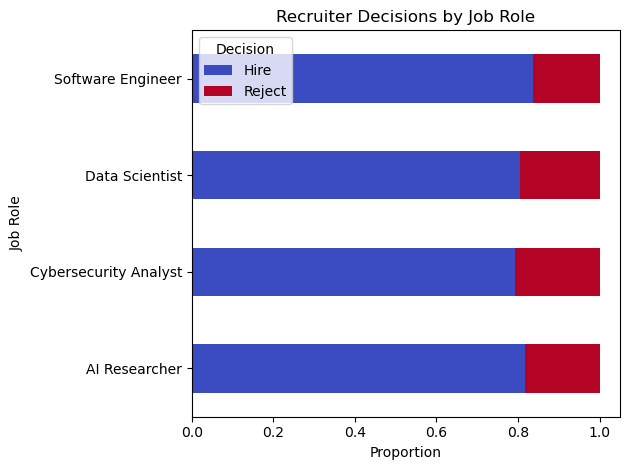

In [ ]:
crosstab = pd.crosstab(df['Job Role'], df['Recruiter Decision'])

# Normalized by row to show proportions
crosstab_prop = crosstab.div(crosstab.sum(axis=1), axis=0)

# Plot
plt.figure(figsize=(12, 6))
crosstab_prop.plot(kind='barh', stacked=True, colormap='coolwarm')
plt.title('Recruiter Decisions by Job Role')
plt.xlabel('Proportion')
plt.ylabel('Job Role')
plt.legend(title='Decision')
plt.tight_layout()
plt.show()

Certain job roles, such as Software Engineer and AI Researcher, have higher hiring proportions compared to others like Cybersecurity Analyst or Data Scientist. This suggests a potential preference for candidates with AI and developing-related expertise. Overall, hiring decisions vary notably by job role, indicating that role-specific expectations may influence recruiter behavior.

### Multivariate Exploration
- Explore relationships between multiple features
### 5.1 Correlation Heatmap

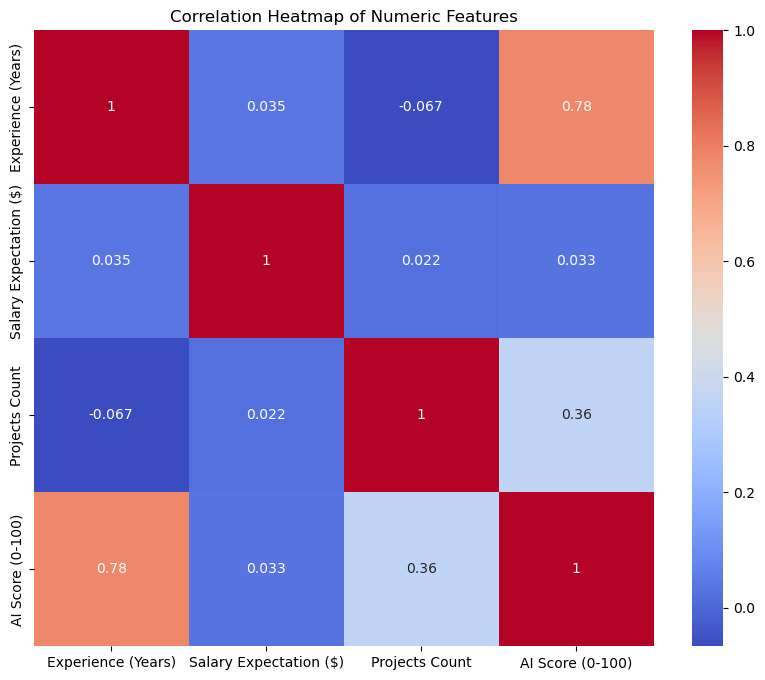

In [47]:
plt.figure(figsize=(10, 8))
sns.heatmap(df[['Experience (Years)', 'Salary Expectation ($)', 'Projects Count', 'AI Score (0-100)']].corr(), 
            annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numeric Features')
plt.show()


AI Score and Experience are strongly correlated (0.78), suggesting the AI model likely weights experience heavily. Project Count also correlates moderately with AI Score (0.36), while Salary Expectations show almost no correlation with Project Count (0.022), suggesting self-estimated salary isn't related to proven project volume.

### 5.2 Pairplot 


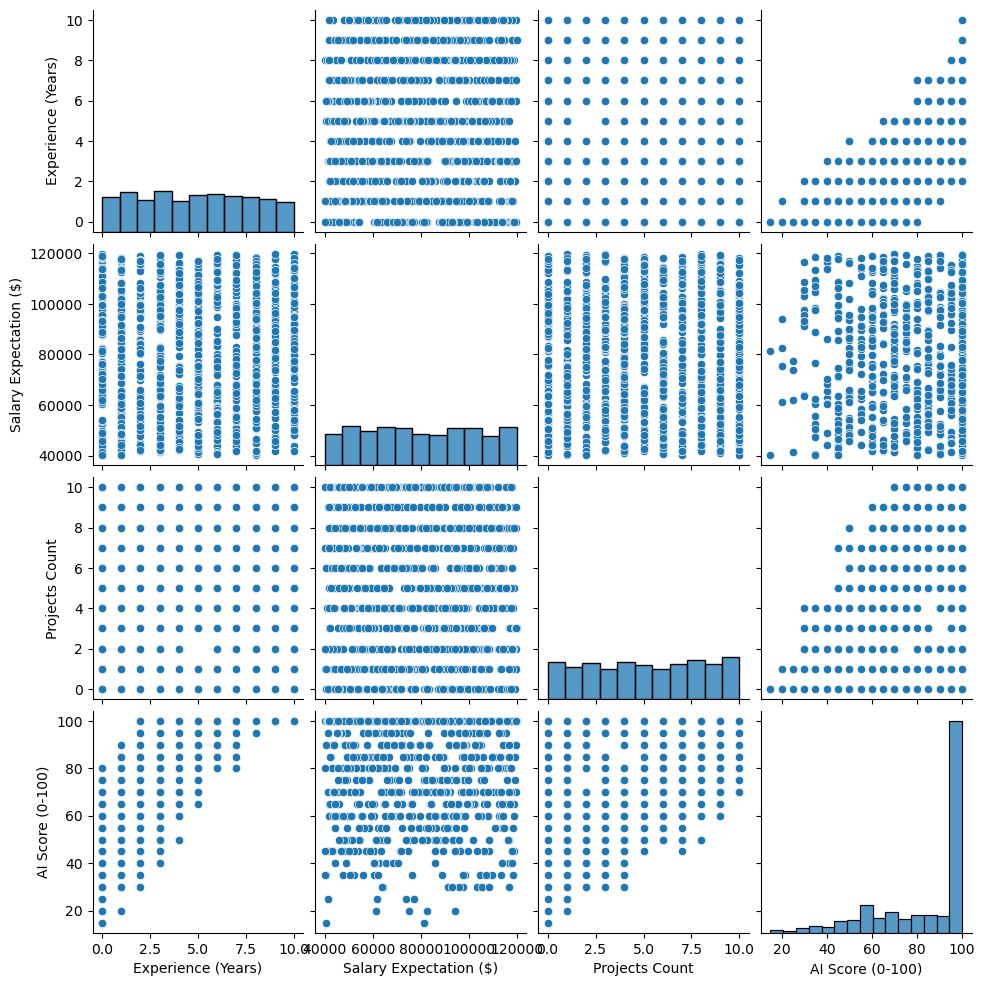

In [48]:
sns.pairplot(df[['Experience (Years)', 'Salary Expectation ($)', 'Projects Count', 'AI Score (0-100)']])
plt.show()


## Statistical Testing
### 6.1 T-Test:
- Compare the AI Scores between Hired and Rejected candidates.


In [49]:
hired_scores = df[df['Recruiter Decision'] == 'Hire']['AI Score (0-100)']
rejected_scores = df[df['Recruiter Decision'] == 'Reject']['AI Score (0-100)']

t_stat, p_val = stats.ttest_ind(hired_scores, rejected_scores)
print(f"T-test: t-statistic = {t_stat:.2f}, p-value = {p_val:.4f}")


T-test: t-statistic = 49.02, p-value = 0.0000


A t-test comparing AI scores between hired and rejected candidates showed a very high t-statistic (49.02) and a p-value of 0.0000, indicating a statistically significant difference. This supports the idea that AI score is a strong predictor of recruiter decision and may be an important feature for modeling.

### ML Preprocessing 
- Since we already handled cleaning and feature engineering in Section 2, here’s a short recap for modeling:

- Label Encoding:
    - Convert the categorical target `Recruiter Decision` to numeric. We will continue this portion in the modeling notebook